# Lead Scoring Case Study


Steps followed to build the model:
1. [Importing Libraries and Data](#1)
2. [Data Understanding and Inspection](#2)
3. [Data Cleaning](#3)
4. [Data Analysis (EDA)](#4)
5. [Data Preparation](#5)
6. [Model Building](#6)
7. [Test-Train Split](#7)
8. [Feature Scaling](#8)
9.  [Model Building](#9)
10. [Model Evaluation](#10)
11. [Predictions on Test Set](#11)
12. [Final Model](#12)

## <p id="1">1. Importing Libraries and Data</p>

In [141]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
# reading the leads dataset
leads_df = pd.read_csv('Leads.csv')

## <p id="2">2. Data Understanding and Inspection</p>

In [143]:
leads_df.shape

(9240, 37)

In [144]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


find unique values in each column in the data frame

In [145]:
# display the info of the dataframe
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [146]:
# check for columnwise null count
leads_df.isnull().sum()


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [147]:
#columnwise null values count in terms of percentages sorted in descending order
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

<strong><span style="color:yellow">Observation:</span></strong>  There are 13 columns with missing values rate > 15%.
Columns with high missing values rate can be dropped.

In [148]:
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [149]:
# unique values count in each column
leads_df.nunique().sort_values(ascending=False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
How did you hear about X Education                 10
Asymmetrique Profile Score                         10
City                                                7
What is your current occupation                     6
Lead Profile                                        6
Lead Origin                                         5
Lead Quality                

In [150]:
# check duplicate rows
leads_df.duplicated().sum()

0

<strong><span style="color:yellow">Observation:</span></strong>  No duplicate columns found in the dataframe

## <p id="3">3. Data Cleaning</p>

#### Handling Missing Values

In [151]:
#columnwise null values count in terms of percentages sorted in descending order
round(100*(leads_df.isna().mean()), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

#### Replacing 'Select' with NaN

Problem statement states that "Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value"

Considering the above statement, we will replace the 'Select' values with NaN.

In [152]:
# find all the column names having value 'Select' in it
def find_cols_with_select_val(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            if df[col].str.contains('Select').any():
                print(col)                

find_cols_with_select_val(leads_df)

Specialization
How did you hear about X Education
Lead Profile
City


<strong><span style="color:yellow">Observation:</span></strong>  There are 4 columns containing 'Select' as a value. We can replace them with NaN as they are not useful for our analysis.

In [153]:
# replace 'Select' with NaN
leads_df = leads_df.replace('Select', np.nan)

In [154]:
find_cols_with_select_val(leads_df)

<strong><span style="color:yellow">Observation:</span></strong>  Select values are now replaced with NaN values.

In [155]:
# lets check columnwise null ratio again
round(100*(leads_df.isna().mean()), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

#### Lets consider 40% as the cut off the null values. If the column has more than 40% null values, we will drop the column.

In [156]:
# drop all the columns with 40% or more missing values

leads_df = leads_df.dropna(thresh=0.6*len(leads_df), axis=1)

In [157]:
leads_df.shape

(9240, 30)

<strong><span style="color:yellow">Observation:</span></strong>  Number of columns in the dataset are now reduced to 30 from 37.

In [158]:
# columns with categorical data

leads_df_cat = leads_df.select_dtypes(include=['object']).columns
print('Number of Categorical Columns: ', len(leads_df_cat))
print('Categorical Columns: ', leads_df_cat)

Number of Categorical Columns:  25
Categorical Columns:  Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


### Imputing missing values

In [159]:
# City column has 39.71% missing values.
#lets check the value counts and decide what to do with it
leads_df['City'].value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

<strong><span style="color:yellow">Observation:</span></strong>  Data is not uniformly distributed. Mumbai has the maximum number of leads. Lets drop the city column as it is skewed towards Mumbai.

In [160]:
# drop city column
leads_df.drop('City', axis=1, inplace=True)
leads_df.shape

(9240, 29)

In [161]:
# Specialization column has 36.58% missing values.
# lets check the value counts of the column
leads_df['Specialization'].value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

<strong><span style="color:yellow">Observation:</span></strong>  Data is uniformly distributed. No outliers are present. Lets create a new category called 'Others'

In [162]:
# create a new category "Others" for the variable "Specialization" with all null values
# leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Others')
leads_df['Specialization'] = leads_df['Specialization'].fillna('Others')

In [163]:
# Tags column has 36.29% missing values.
# lets check the value counts of the column
leads_df['Tags'].value_counts(normalize=True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [164]:
#### Tags and Country column is irrelavant for the model. Hence, dropping it.
leads_df.drop(['Tags', 'Country'], axis=1, inplace=True)

In [165]:
# 'What matters most to you in choosing a course' column has 29.32% missing values.
# lets check the value counts of the column
leads_df['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [166]:
# 'What matters most to you in choosing a course' column data is highly skewed.
# So we are dropping this column.
leads_df.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [167]:
# 'What is your current occupation' has 29.11% missing values
# lets check the value counts
leads_df['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [168]:
# lets impute the missing values in 'What is your current occupation' with 'Unemployed'
leads_df['What is your current occupation'].fillna('Unemployed', inplace=True)

In [169]:
leads_df['TotalVisits'].value_counts(normalize=True)*100

0.0      24.047017
2.0      18.455454
3.0      14.346919
4.0      12.303636
5.0       8.601560
6.0       5.119191
1.0       4.339229
7.0       3.394485
8.0       2.460727
9.0       1.801604
10.0      1.252334
11.0      0.944743
13.0      0.527299
12.0      0.494343
14.0      0.395474
16.0      0.230693
15.0      0.197737
17.0      0.175766
18.0      0.164781
20.0      0.131825
19.0      0.098869
21.0      0.065912
23.0      0.065912
24.0      0.054927
25.0      0.054927
27.0      0.054927
22.0      0.032956
29.0      0.021971
28.0      0.021971
26.0      0.021971
141.0     0.010985
55.0      0.010985
30.0      0.010985
43.0      0.010985
74.0      0.010985
41.0      0.010985
54.0      0.010985
115.0     0.010985
251.0     0.010985
32.0      0.010985
42.0      0.010985
Name: TotalVisits, dtype: float64

In [170]:
# Impute TotalVisits with mode
leads_df['TotalVisits'].fillna(leads_df['TotalVisits'].mode()[0], inplace=True) 

In [171]:
leads_df['Page Views Per Visit'].value_counts(normalize=True)*100

0.00    24.047017
2.00    19.718774
3.00    13.138526
4.00     9.842909
1.00     7.151489
          ...    
3.43     0.010985
2.56     0.010985
6.33     0.010985
1.64     0.010985
2.08     0.010985
Name: Page Views Per Visit, Length: 114, dtype: float64

In [172]:
# Impute Page Views Per Visit with mode value
leads_df['Page Views Per Visit'].fillna(leads_df['Page Views Per Visit'].mode()[0], inplace=True)

In [173]:
leads_df['Lead Source'].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [174]:
# Imputing the Lead Source column with the mode value i.e. Google
leads_df['Lead Source'].fillna('Google', inplace=True)

In [175]:
leads_df['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [176]:
# Imputing the Last Activity column with the mode value i.e. Email Opened
leads_df['Last Activity'].fillna('Email Opened', inplace=True)

In [177]:
# lets check the unique values in each column
leads_df.nunique()

Prospect ID                                 9240
Lead Number                                 9240
Lead Origin                                    5
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1731
Page Views Per Visit                         114
Last Activity                                 17
Specialization                                19
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates

In [178]:
# assign column names with 1 unique value to a list
cols_with_one_unique_val = [col for col in leads_df.columns if leads_df[col].nunique() == 1]
cols_with_one_unique_val

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [179]:
# columns with one unique value doesnt contribute to the model building,
# lets drop them
leads_df.drop(cols_with_one_unique_val, axis=1, inplace=True)

In [180]:
# dropping Prospect ID, Lead Number, Last Notable Activity as they do not contribute to the model
leads_df.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)

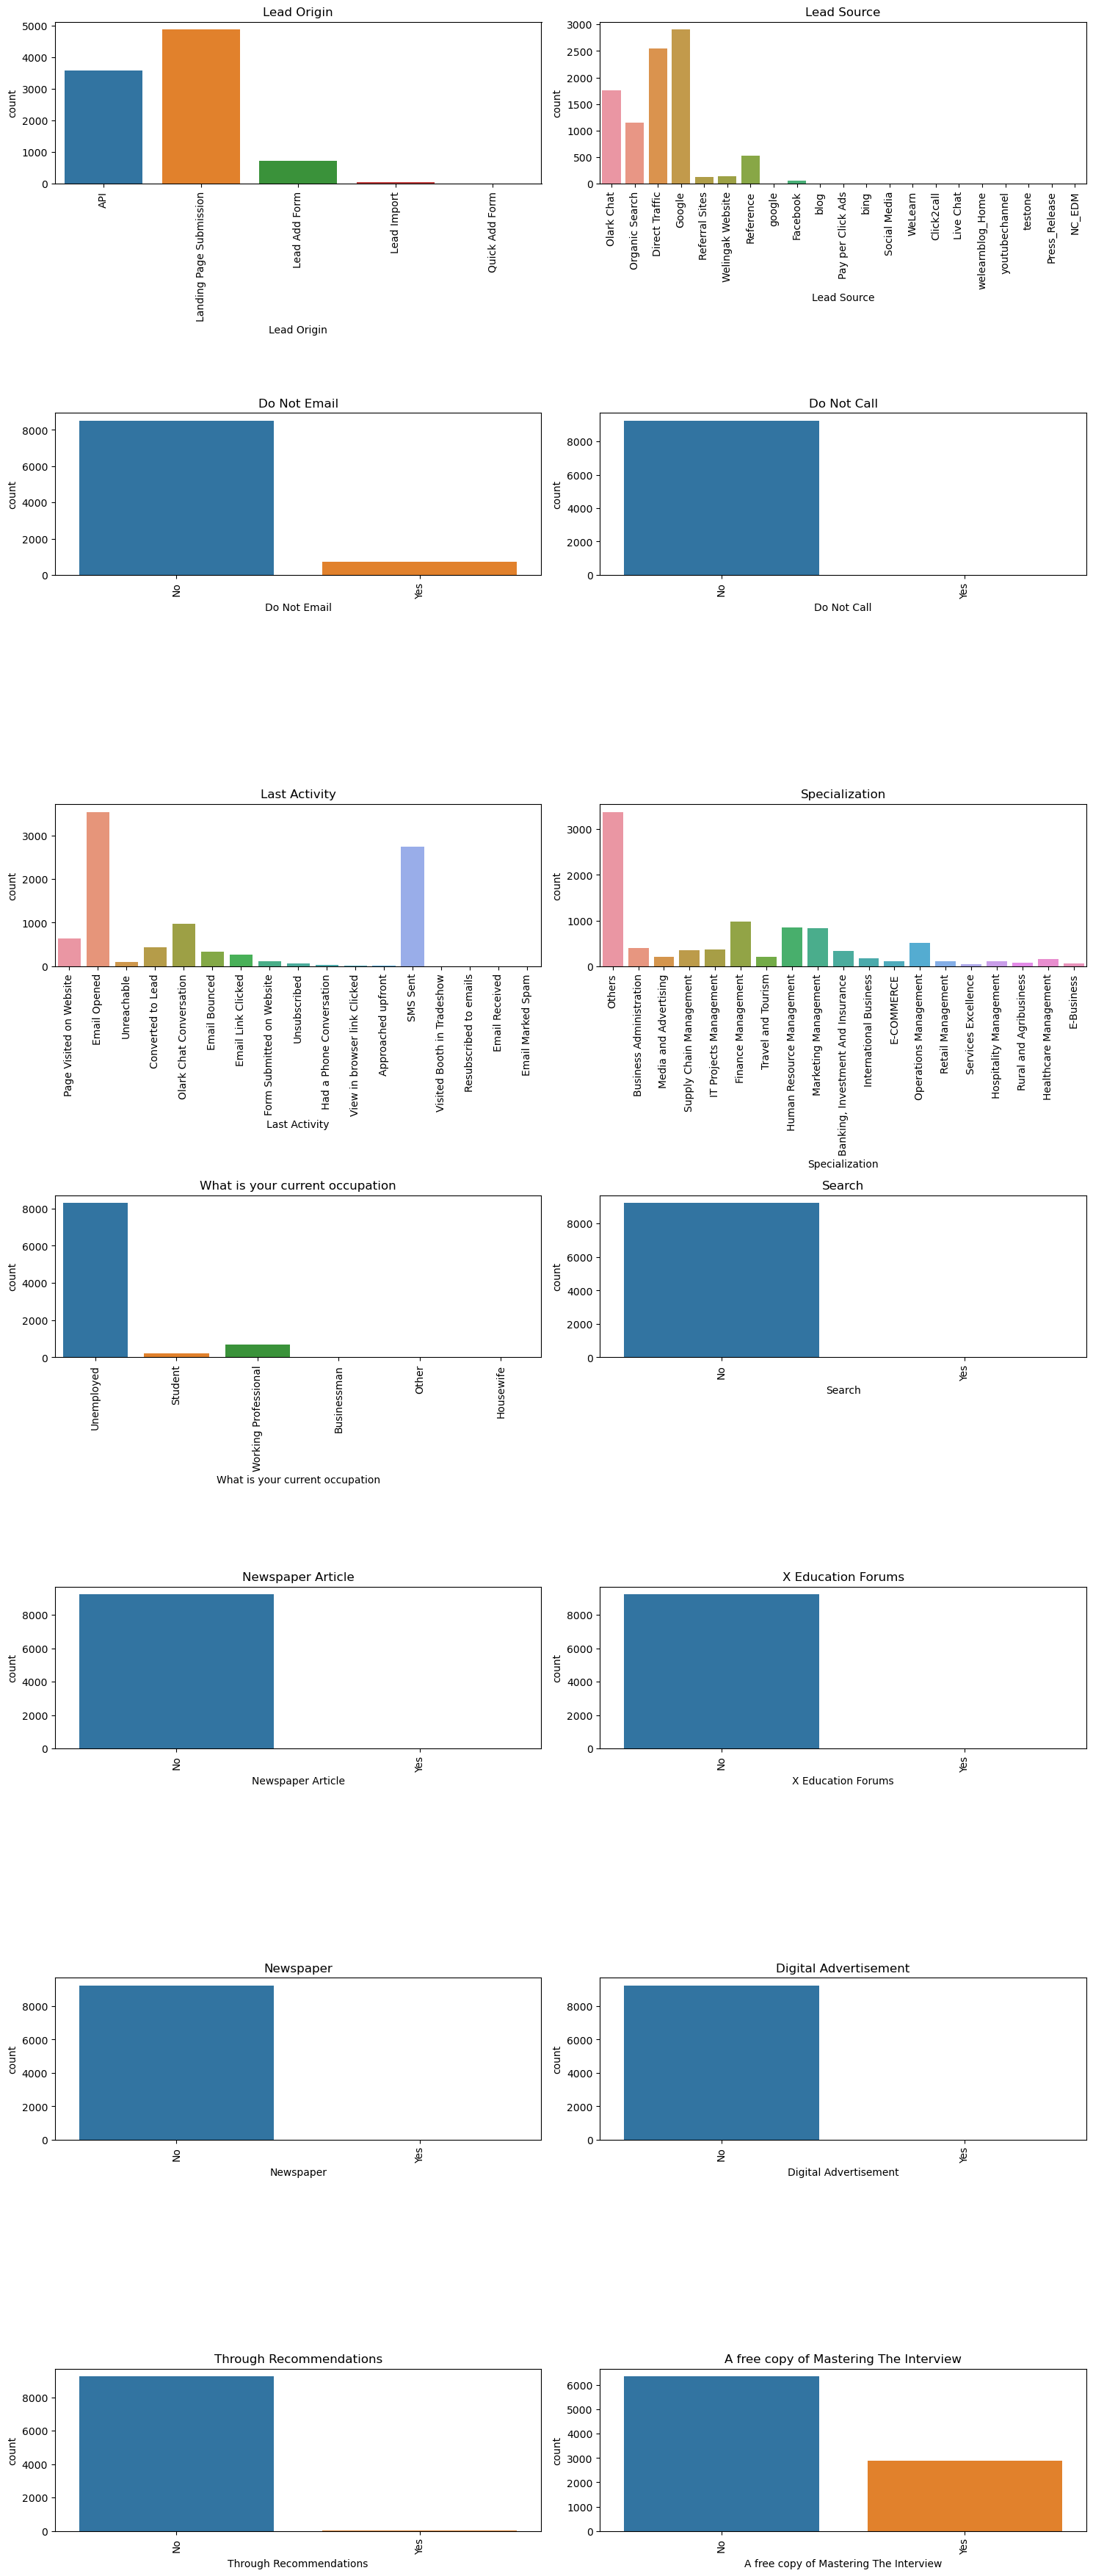

In [181]:
def plot_count_plots(dataframe, cols):
    plt.figure(figsize=(15, 40))  # Adjust the figure size if needed

    for col in cols:
        plt.subplot(8, 2, cols.index(col) + 1)
        sns.countplot(data=dataframe, x=col)
        plt.title(col, fontsize=12)
        plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

categorical_col = leads_df.select_dtypes(include=['category', 'object']).columns.tolist()
plot_count_plots(leads_df, categorical_col)

<strong><span style="color:yellow">Observation:</span></strong> 
Following columns are highly skewed
- Through Recommendations
- Newspaper
- Newspaper Article
- Digital Advertisement
- X Education Forums
- Search
- Do not Call

Since these columns are highly skewed, we can drop these columns as they will not add any value to our analysis.


In [182]:

leads_df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)


In [189]:
# Mapping binary categorical variables (Yes/No to 1/0) 
leads_df['Do Not Email'] = leads_df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

leads_df['A free copy of Mastering The Interview'] = leads_df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x =='Yes' else 0)

#### Outlier Analysis

In [183]:
# numeric columns
numerical_cols = leads_df.select_dtypes(exclude=['category', 'object']).columns.tolist()

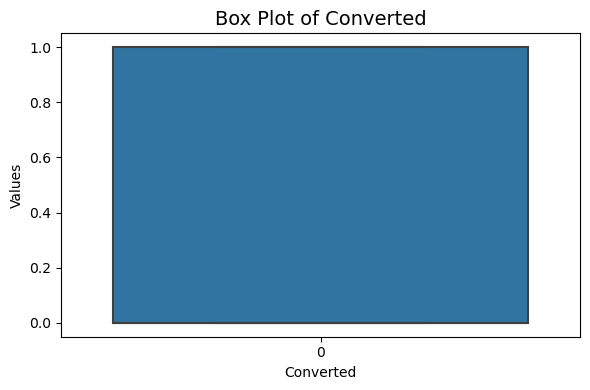

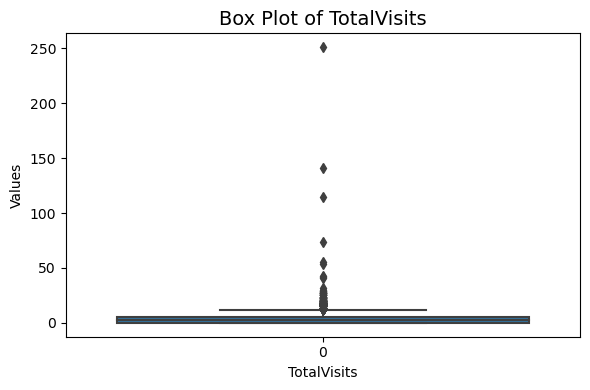

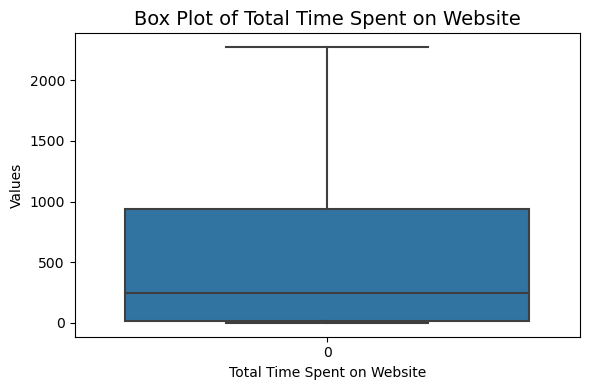

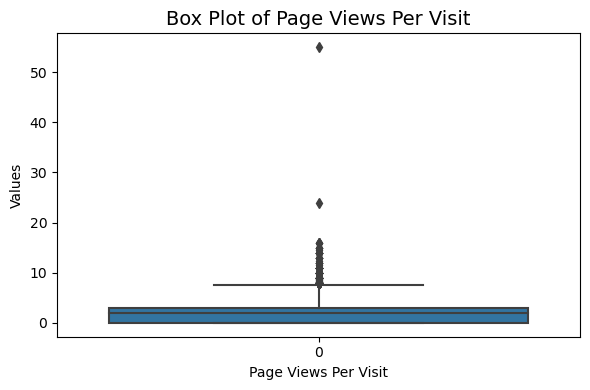

In [184]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))  # Adjust the figure size if needed

    sns.boxplot(data=leads_df[col])

    plt.title(f'Box Plot of {col}', fontsize=14)
    plt.ylabel('Values')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

#### Outlier Treatment

In [185]:
def perform_outlier_treatment(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    treated_data = dataframe[(dataframe[column] > lower_bound) & (dataframe[column] < upper_bound)]
    return treated_data

columns_to_treat = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

for col in columns_to_treat:
    leads_df = perform_outlier_treatment(leads_df, col)

In [186]:
leads_df.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8844.000000,8844.000000,8844.000000,8844.000000
mean,0.383650,2.867933,478.548507,2.121740
std,0.486302,2.545298,545.933641,1.753057
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000
50%,0.000000,3.000000,239.000000,2.000000
75%,1.000000,4.000000,915.250000,3.000000
95%,1.000000,8.000000,1556.000000,5.000000
max,1.000000,12.000000,2272.000000,7.000000


In [190]:
leads_df['Lead Source'].value_counts()

Google               2817
Direct Traffic       2420
Olark Chat           1750
Organic Search        995
Reference             532
Welingak Website      141
Referral Sites        109
Facebook               54
bing                    6
google                  5
Click2call              3
Social Media            2
Live Chat               2
youtubechannel          1
Press_Release           1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [195]:
# Group the values of the column 'Lead Source' into a new value 'Others' if the value count is less than 10 in the column 'Lead Source'
category_counts = leads_df['Lead Source'].value_counts()
category_names_less_than_10 = category_counts[category_counts < 10].index.tolist()

leads_df.loc[leads_df['Lead Source'].isin(category_names_less_than_10), 'Lead Source'] = 'Others'

leads_df['Lead Source'].value_counts()

Google              2817
Direct Traffic      2420
Olark Chat          1750
Organic Search       995
Reference            532
Welingak Website     141
Referral Sites       109
Facebook              54
Others                26
Name: Lead Source, dtype: int64

In [197]:
# Group the values of the variable 'Last Activity' into a new category called 'Others' if the value count is less than 100

category_counts = leads_df['Last Activity'].value_counts()
category_names_less_than_100 = category_counts[category_counts < 100].index.tolist()

leads_df.loc[leads_df['Last Activity'].isin(category_names_less_than_100), 'Last Activity'] = 'Others'

leads_df['Last Activity'].value_counts()

Email Opened                 3402
SMS Sent                     2633
Olark Chat Conversation       954
Page Visited on Website       544
Converted to Lead             426
Email Bounced                 320
Email Link Clicked            260
Others                        194
Form Submitted on Website     111
Name: Last Activity, dtype: int64

In [199]:
print(leads_df.select_dtypes(include=['category', 'object']).columns.tolist())
print(leads_df.select_dtypes(exclude=['category', 'object']).columns.tolist())

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation']
['Do Not Email', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'A free copy of Mastering The Interview']


## <p id="4">4. Data Analysis (EDA)</p>

## <p id="5">5. Data Preparation</p>

## <p id="6">6. Model Building</p>

## <p id="7">7. Test-Train Split</p>

## <p id="8">8. Feature Scaling</p>

## <p id="9">9. Model Building</p>

## <p id="10">10. Model Evaluation</p>

## <p id="11">11. Predictions on Test Set</p>

## <p id="12">12. Final Model</p>